# Prediction of used cars prices

In [2]:
#pip install pandas matplotlib numpy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Chargement des données

train = pd.read_csv(r'C:\Users\racha\OneDrive\Mes projets portfolio\REGRESSION-OF-USED-CAR-PRICES\input\train.csv')
test = pd.read_csv(r'C:\Users\racha\OneDrive\Mes projets portfolio\REGRESSION-OF-USED-CAR-PRICES\input\test.csv')


# Aperçu des données

print("Aperçu des données d'entraînement :")
print(train.head())
print("\nInformations sur les données d'entraînement :")
print(train.info())


# Statistiques descriptives

print("\nStatistiques descriptives des variables numériques :")
print(train.describe())


# Vérification des valeurs manquantes

missing_values = train.isnull().sum()
print("\nValeurs manquantes dans chaque colonne :")
print(missing_values[missing_values > 0])


Aperçu des données d'entraînement :
   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   

In [5]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np

def replace_na_with_probabilities(df, column):
    # Calculer les proportions des catégories existantes
    proportions = df[column].value_counts(normalize=True)
    
    # Tirer des échantillons en fonction des proportions pour les valeurs manquantes
    na_indices = df[df[column].isna()].index
    if not na_indices.empty:
        sampled_values = np.random.choice(proportions.index, size=len(na_indices), p=proportions.values)
        df.loc[na_indices, column] = sampled_values

# Appliquer la fonction sur la colonne 'fuel_type'
replace_na_with_probabilities(train, 'fuel_type')

# Appliquer la fonction sur d'autres colonnes catégorielles si nécessaire
replace_na_with_probabilities(train, 'accident')
replace_na_with_probabilities(train, 'clean_title')

# Vérifier les valeurs manquantes après remplacement
print(train.isna().sum())


In [7]:
# Liste des colonnes catégorielles
categorical_columns = ['fuel_type', 'accident', 'clean_title']

# Appliquer l'algorithme EM sur les données d'entraînement
train_em = em_algorithm(train.copy(), categorical_columns)

# Vérification des valeurs manquantes après application de l'algorithme EM
print("\nVérification des valeurs manquantes après l'application de l'algorithme EM :")
print(train_em.isnull().sum())

# Vérification des valeurs uniques dans les colonnes catégorielles
for col in categorical_columns:
    print(f"\nValeurs uniques dans {col} après l'algorithme EM :")
    print(train_em[col].value_counts())

C:\Users\racha\AppData\Local\Temp\ipykernel_23260\1024856031.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)  # Fill missing values with mode
C:\Users\racha\AppData\Local\Temp\ipykernel_23260\1024856031.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 


Vérification des valeurs manquantes après l'application de l'algorithme EM :
id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

Valeurs uniques dans fuel_type après l'algorithme EM :
fuel_type
2    171023
3      6832
1      5406
0      3955
6       781
4       521
5        15
Name: count, dtype: int64

Valeurs uniques dans accident après l'algorithme EM :
accident
1    146966
0     41567
Name: count, dtype: int64

Valeurs uniques dans clean_title après l'algorithme EM :
clean_title
0    188533
Name: count, dtype: int64


## Correlation 

### Variables numériques

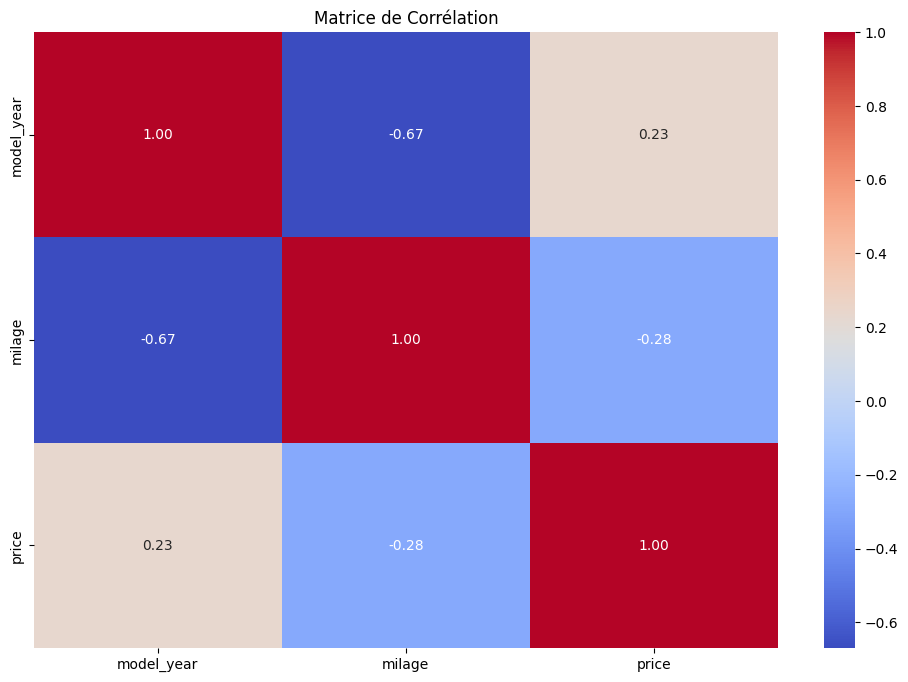

In [8]:
# Sélectionner uniquement les colonnes numériques
numeric_cols = train.select_dtypes(include=[np.number])
numeric_cols  = numeric_cols.iloc[:, 1:]
# Calculer la matrice de corrélation
correlation_matrix = numeric_cols.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()


### Variables catégorielles 

In [ ]:
# One-Hot Encoding pour les variables catégorielles
train_encoded = pd.get_dummies(train, drop_first=True)

# Calculer la matrice de corrélation sur le dataset encodé
correlation_matrix_encoded = train_encoded.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation (Encodée)')
plt.show()

## Préparation des données 

In [11]:
from sklearn.model_selection import train_test_split

X = train_em.drop('price', axis=1)  # Variables indépendantes
y = train_em['price']  # Variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
train_em